In [111]:
import numpy as np  
import pandas as pd  
import yfinance as yf
from datetime import datetime, timedelta
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [115]:
ticker = "MSFT"
strike_delta = 0.1 # e.g. 0.1 represents 10%

end_date = datetime.today().date()
start_date = end_date - timedelta(days=365)

data = yf.download('MSFT', start=start_date, end=end_date)["Close"]

strike = data.iloc[-1] * (1 * (1 + strike_delta))
strike = strike.values

C:\Users\sabbi\AppData\Local\Temp\ipykernel_3928\3793182473.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('MSFT', start=start_date, end=end_date)["Close"]
[*********************100%***********************]  1 of 1 completed


In [9]:
data

Ticker,MSFT
Date,
2024-08-06,396.569519
2024-08-07,395.398468
2024-08-08,399.626099
2024-08-09,402.930756
2024-08-12,403.714722
...,...
2025-07-30,513.239990
2025-07-31,533.500000
2025-08-01,524.109985


In [11]:
log_returns = np.log(1 + data.pct_change())

In [13]:
log_returns

Ticker,MSFT
Date,
2024-08-06,NaN
2024-08-07,-0.002957
2024-08-08,0.010635
2024-08-09,0.008235
2024-08-12,0.001944
...,...
2025-07-30,0.001306
2025-07-31,0.038716
2025-08-01,-0.017758


In [15]:
stdev = log_returns.std() * 250 ** 0.5
stdev

Ticker
MSFT    0.246796
dtype: float64

In [17]:
stdev = stdev.values
stdev

array([0.24679629])

In [19]:
ticker = yf.Ticker("SR3=F") # use 3 month SOFR Futures via CME Group as proxy for the risk free rate
rfr_data = ticker.history(period="1y")[["Close"]]
rfr_data["Risk Free Rate"] = 100 - rfr_data["Close"]
# print(data.tail())
rfr_data

,Close,Risk Free Rate
Date,,
2025-08-06 00:00:00-04:00,95.919998,4.080002


In [21]:
risk_free_rate_value = float(rfr_data["Risk Free Rate"].iloc[-1])/100
print(risk_free_rate_value)

0.04080001831054687


In [23]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000

In [25]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]
S[0] = S0 
r = risk_free_rate_value

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [27]:
S

array([[527.75      , 527.75      , 527.75      , ..., 527.75      ,
        527.75      , 527.75      ],
       [521.63504955, 531.3063394 , 532.81580189, ..., 534.56759788,
        528.18826844, 528.28975612],
       [527.3761434 , 536.23846971, 529.44055205, ..., 536.80644667,
        527.43725595, 530.84909387],
       ...,
       [483.44519464, 492.0851514 , 513.00720015, ..., 586.15341807,
        433.36524223, 505.92223847],
       [479.80448898, 497.80275899, 512.51230513, ..., 580.24554781,
        434.46726627, 519.70212596],
       [484.95034133, 489.7545135 , 512.62264227, ..., 560.40832608,
        432.43880694, 527.15668057]])

In [29]:
S.shape

(251, 10000)

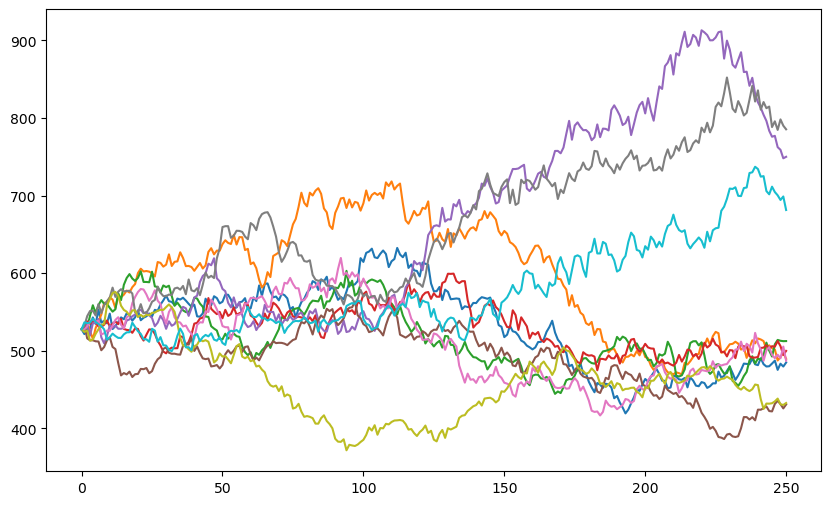

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);
plt.show()

In [33]:
p = np.maximum(S[-1] - strike, 0)

In [35]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [37]:
p.shape

(10000,)

In [39]:
C = np.exp(risk_free_rate_value * T) * np.sum(p) / iterations
C
print(f"The call option price is {C:0.2f},")
print(f"spot price is {S0.iloc[-1]:0.2f},")
print(f"strike is {strike[0]:0.2f},")
print(f"risk free rate is {r * 100:0.2f}%") 
print(f"and expiry date is {T:0.2f} years")

The call option price is 42.56,
spot price is 527.75,
strike is 580.53,
risk free rate is 4.08%
and expiry date is 1.00 years


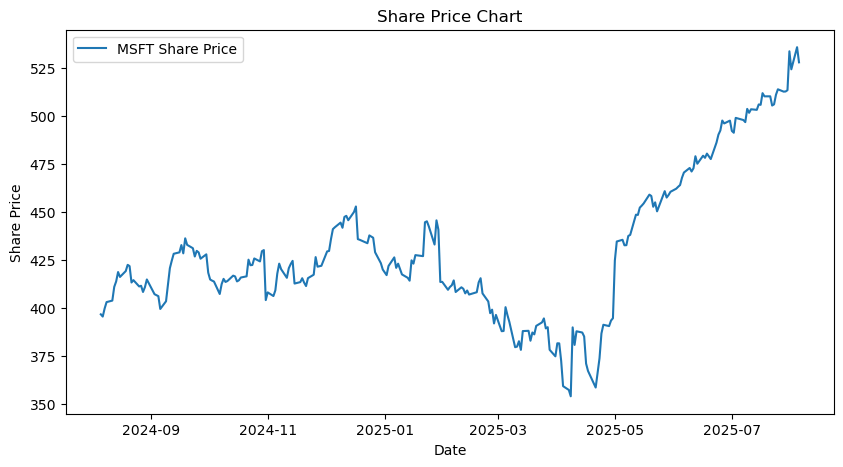

In [89]:
fig = plt.figure()

axes1 = fig.add_axes([0.1,0.1,1.2,0.8])

axes1.plot(data, label=data.columns + " Share Price")
axes1.set_title("Share Price Chart")
axes1.set_xlabel("Date")
axes1.set_ylabel("Share Price")
axes1.legend()

#data.plot(figsize=(10, 6));
plt.show()

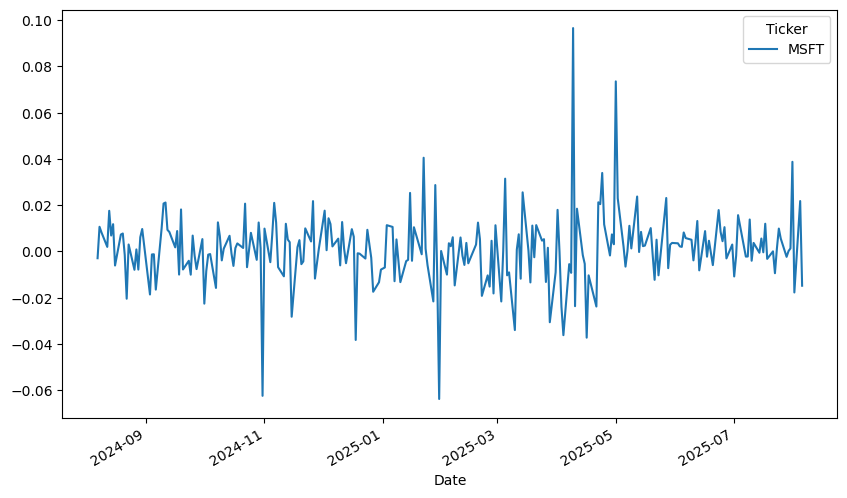

In [107]:
log_returns.plot(figsize=(10, 6));
plt.show()